In [24]:
# importation des libraries

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import SGDRegressor


# lecture des données et mise en forme

df = pd.read_csv('Données historiques Bitcoin - Investing.com.csv', encoding='utf-8')
df["Date"] = pd.to_datetime(df["Date"],infer_datetime_format=True)

# df = df[['Date','Vol.','Variation %','Ouv.', 'Plus Haut', 'Plus Bas']]

df.sort_values('Date',ascending=False)


,Date,Dernier,Ouv.,Plus Haut,Plus Bas,Vol.,Variation %
4366,2022-07-01,"19.262,9","19.926,6","20.785,6","18.980,1","150,18K","-3,33%"
4365,2022-06-30,"19.926,6","20.111,3","20.155,1","18.682,7","127,73K","-0,92%"
4364,2022-06-29,"20.111,3","20.278,0","20.415,8","19.880,7","98,97K","-0,82%"
4363,2022-06-28,"20.278,0","20.727,9","21.200,2","20.210,5","83,83K","-2,18%"
4362,2022-06-27,"20.730,2","21.037,7","21.497,5","20.568,0","84,69K","-1,49%"
...,...,...,...,...,...,...,...
4,2010-07-22,"0,1","0,1","0,1","0,1","2,16K","0,00%"
3,2010-07-21,"0,1","0,1","0,1","0,1","0,58K","0,00%"
2,2010-07-20,"0,1","0,1","0,1","0,1","0,26K","0,00%"
1,2010-07-19,"0,1","0,1","0,1","0,1","0,57K","0,00%"


Source et collecte des données : https://fr.investing.com/crypto/bitcoin/historical-data

Prix journalier du BTC du 18/07/2010 au 01/07/2022 ,4367 elements

Nous souhaitons prédire le prix du btc, notre target sera donc le dernier prix connu journalier (prix a la fermeture de la séance), il s'agit donc d'une variable quantitative continue


In [38]:
# definition des colonnes features et target + nettoyage données

date = df['Date']
open = df['Ouv.'].str.replace('.','').str.replace(',','.').astype(float)
close = df['Dernier'].str.replace('.','').str.replace(',','.').astype(float)
High = df['Plus Haut'].str.replace('.','').str.replace(',','.').astype(float)
low = df['Plus Bas'].str.replace('.','').str.replace(',','.').astype(float)
volume = df['Vol.']
variation = df['Variation %']



Date
2010-07-18        0.0
2010-07-19        0.1
2010-07-20        0.1
2010-07-21        0.1
2010-07-22        0.1
               ...   
2022-06-27    21037.7
2022-06-28    20727.9
2022-06-29    20278.0
2022-06-30    20111.3
2022-07-01    19926.6
Name: Ouv., Length: 4367, dtype: float64


/tmp/ipykernel_22490/2090251084.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  open = df['Ouv.'].str.replace('.','').str.replace(',','.').astype(float)
/tmp/ipykernel_22490/2090251084.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  close = df['Dernier'].str.replace('.','').str.replace(',','.').astype(float)
/tmp/ipykernel_22490/2090251084.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  High = df['Plus Haut'].str.replace('.','').str.replace(',','.').astype(float)
/tmp/ipykernel_22490/2090251084.py:7: FutureWa

In [29]:
df.index=df['Date']

Evolution du prix du BTC sur le temps

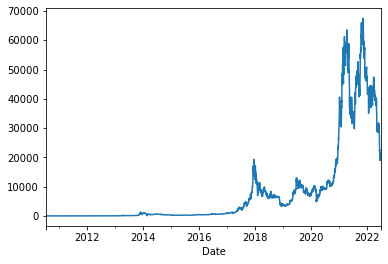

In [39]:
close.plot()

In [28]:
# on entraine le modele 

model = SGDRegressor(max_iter=100, eta0=0.0001).fit(x,y)
x = df[['Date','Vol.','Variation %','Ouv.', 'Plus Haut', 'Plus Bas']]
y = df['Dernier']


print(model.coef_)


TypeError: float() argument must be a string or a number, not 'Timestamp'